In [18]:
#!pip install catboost

In [19]:
#импортируем нужные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

testing = pd.read_csv('poker-hand-testing.data.csv', sep = ',')
training = pd.read_csv('poker-hand-training-true.data.csv', sep = ',')

import catboost as cb
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', 600)

In [20]:
#Смотрим на датасет
testing.head()

,1,1.1,1.2,13,2,4,2.1,3,1.3,12,0
0,3,12,3,2,3,11,4,5,2,5,1
1,1,9,4,6,1,4,3,2,3,9,1
2,1,4,3,13,2,13,2,1,3,6,1
3,3,10,2,7,1,2,2,11,4,9,0
4,1,3,4,5,3,4,1,12,4,6,0


In [21]:
'''
COLUMN INFO
Color — масть карты: (1-4) = {черви, пики, буби, крести}  
Rank — ранг карты: (1-13) = {туз, 2, 3, ... дама, король}

HandName - название руки:
0: Мусор 
1: Одна пара;  
2: Две пары;  
3: Тройка;  
4: Стрейт;  
5: Флэш;  
6: Фулл Хаус;  
7: Каре;  
8: Стрейт флэш;  
9: Флэш рояль;  

'''

#Переименовываем столбцы: 
testing.columns = ['Color1', 'Rank1', 'Color2', 'Rank2', 
              'Color3', 'Rank3', 'Color4', 'Rank4', 'Color5', 'Rank5',
              'HandName']
training.columns = ['Color1', 'Rank1', 'Color2', 'Rank2', 
              'Color3', 'Rank3', 'Color4', 'Rank4', 'Color5', 'Rank5',
              'HandName']
print(testing.head(5))
print(training.head(5))

   Color1  Rank1  Color2  Rank2  Color3  Rank3  Color4  Rank4  Color5  Rank5  \
0       3     12       3      2       3     11       4      5       2      5   
1       1      9       4      6       1      4       3      2       3      9   
2       1      4       3     13       2     13       2      1       3      6   
3       3     10       2      7       1      2       2     11       4      9   
4       1      3       4      5       3      4       1     12       4      6   

   HandName  
0         1  
1         1  
2         1  
3         0  
4         0  
   Color1  Rank1  Color2  Rank2  Color3  Rank3  Color4  Rank4  Color5  Rank5  \
0       2     11       2     13       2     10       2     12       2      1   
1       3     12       3     11       3     13       3     10       3      1   
2       4     10       4     11       4      1       4     13       4     12   
3       4      1       4     13       4     12       4     11       4     10   
4       1      2       1      4    

In [22]:
print(testing['Rank1'].value_counts())

6     77282
1     77251
11    77232
4     77098
13    76918
12    76918
10    76884
5     76877
2     76877
8     76838
3     76808
7     76581
9     76435
Name: Rank1, dtype: int64


In [23]:
print(testing.shape)
print(training.shape)

(999999, 11)
(25009, 11)


In [24]:
testing.describe()

,Color1,Rank1,Color2,Rank2,Color3,Rank3,Color4,Rank4,Color5,Rank5,HandName
count,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000
mean,2.500495,6.997933,2.499895,7.006091,2.500872,6.998876,2.500394,7.002302,2.499452,6.989476,0.616903
std,1.117767,3.743371,1.118568,3.743478,1.118225,3.741891,1.117246,3.741270,1.118948,3.739893,0.773377
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,4.000000,1.000000,4.000000,1.000000,4.000000,2.000000,4.000000,1.000000,4.000000,0.000000
50%,3.000000,7.000000,3.000000,7.000000,3.000000,7.000000,3.000000,7.000000,2.000000,7.000000,0.000000
75%,3.000000,10.000000,4.000000,10.000000,4.000000,10.000000,3.000000,10.000000,4.000000,10.000000,1.000000
max,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,9.000000


In [25]:
print('Количество комбинаций в датасете:')
print(testing.groupby('HandName').size())
print('\n',training.groupby('HandName').size())

Количество комбинаций в датасете:
HandName
0    501208
1    422498
2     47622
3     21121
4      3885
5      1996
6      1424
7       230
8        12
9         3
dtype: int64

 HandName
0    12493
1    10599
2     1206
3      513
4       93
5       54
6       36
7        6
8        5
9        4
dtype: int64


In [26]:
myCorrelation = testing.corr()

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(myCorrelation, annot = True)

In [35]:
testing.head(15)

,Color1,Rank1,Color2,Rank2,Color3,Rank3,Color4,Rank4,Color5,Rank5,HandName
61842,4,12,4,1,4,13,4,11,4,10,9
289230,2,10,2,11,2,13,2,1,2,12,9
944521,4,1,4,11,4,10,4,12,4,13,9
970097,1,8,1,7,1,9,1,5,1,6,8
197592,3,4,3,5,3,3,3,1,3,2,8
280631,2,7,2,6,2,4,2,5,2,8,8
128992,2,10,2,11,2,9,2,7,2,8,8
27552,4,5,4,4,4,8,4,6,4,7,8
951420,1,7,1,3,1,6,1,5,1,4,8
388598,2,8,2,7,2,5,2,6,2,4,8


In [36]:
testing = testing.sort_values(['HandName'], ascending = False)
testing.head(15)

,Color1,Rank1,Color2,Rank2,Color3,Rank3,Color4,Rank4,Color5,Rank5,HandName
61842,4,12,4,1,4,13,4,11,4,10,9
944521,4,1,4,11,4,10,4,12,4,13,9
289230,2,10,2,11,2,13,2,1,2,12,9
388598,2,8,2,7,2,5,2,6,2,4,8
991930,4,10,4,12,4,9,4,11,4,13,8
509064,2,12,2,11,2,13,2,9,2,10,8
616200,1,8,1,7,1,11,1,10,1,9,8
388801,4,11,4,7,4,9,4,10,4,8,8
795037,3,13,3,11,3,12,3,10,3,9,8
951420,1,7,1,3,1,6,1,5,1,4,8


## Пробуем катбуст

In [37]:
#Разделяем на Х, Xte - весь датасет без таргет признака
#y, yte - только наблюдения-таргет признаки

X = training.drop(['HandName'],axis=1)
y = training.HandName
Xte = testing.drop(['HandName'],axis=1)
yte = testing.HandName

In [38]:
print(X.shape[0])
print(y.shape[0])
print(Xte.shape[0])
print(yte.shape[0])

25009
25009
999999
999999


In [39]:
print(training.shape)
print(testing.shape)

(25009, 11)
(999999, 11)


In [40]:
#CatBoost - пробуем метод классификации
#random_state = seed, оставить значение 123 для возможности повтора метода
#CROSS-VALIDATION AND PREDICTION
def CVandPRED (X, y, Xte, yte):
    #Кросс-валидация: 20% отрываем, смотрим на 80% 
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                       test_size=0.2, 
                                                       random_state=123,
                                                       stratify = y) 
    #Объявляем КатБуст, заносим логику метода в переменную cat
    #Loss Function = формула-условие для подсчетов
    cat = cb.CatBoostClassifier(
        loss_function='MultiClassOneVsAll',
        random_seed = 123
    )
    cat_model = cat.fit(X_train,y_train,verbose=False) 

    
    cat_predA = cat_model.predict(X_test, prediction_type='Class')
    cat_predLL = cat_model.predict(X_test, prediction_type='Probability')

    print("CV accuracy: {}".format(accuracy_score(y_test,cat_predA)))
    print("CV logloss: {}".format(log_loss(y_test,cat_predLL)))
    
    #Треним со всеми Х и y, Тестим со всеми Xte, yte:
    cat_model = cat.fit(X,y,verbose=False)

    cat_predAt = cat_model.predict(Xte, prediction_type='Class')
    cat_predLLt = cat_model.predict(Xte, prediction_type='Probability')

    print("Test accuracy: {}".format(accuracy_score(yte,cat_predAt)))
    print("Test logloss: {}".format(log_loss(yte,cat_predLLt)))
    
    return (cat_predA, cat_predLL, cat_predAt, cat_predLLt)

In [41]:
#Поехали
(cat_predA, cat_predLL, cat_predAt, cat_predLLt) = CVandPRED(X,y,Xte,yte)

CV accuracy: 0.6965213914434226
CV logloss: 0.7300541188375735
Test accuracy: 0.6947756947756948
Test logloss: 0.7236412299288643


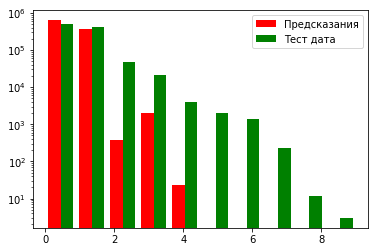

<Figure size 1080x1080 with 0 Axes>

In [42]:
#Рисуем
plt.hist((np.reshape(cat_predAt,(yte.shape[0],)),yte),bins = 10, log=True, color = ['Red', 'Green'])
plt.legend(labels=('Предсказания','Тест дата'))
plt.figure(figsize = (15,15))
plt.show()

## Feature Generation

In [43]:
#Совмещаем данные
all_data = pd.concat([training, testing]).reset_index(drop=True)

## ВОТ ОТСЮДА МОЖНО УДАЛЯТЬ ПОТОМ

In [44]:
#https://stackoverflow.com/questions/46256279/bin-elements-per-row-vectorized-2d-bincount-for-numpy
def bincount2D_vectorized(a):    
    N = a.max() + 1 
    a_offs = a + np.arange(a.shape[0])[:,None]*N
    return np.bincount(a_offs.ravel(), minlength=a.shape[0]*N).reshape(-1,N)

S = all_data.iloc[:,[0,2,4,6,8]].astype(int)
S = pd.DataFrame(bincount2D_vectorized(S.values),columns=['suit0','suit1','suit2','suit3','suit4'])
all_data = pd.merge(all_data, S, how='left', left_index=True, right_index=True).drop(['suit0'],axis=1)
#bincount starts counting from 0, but our suits start at 1.  Dropping suit0.

R = all_data.iloc[:,np.arange(1,10,2)].astype(int)
cols = ['rank{}'.format(x) for x in range(0,14,1)]
R = pd.DataFrame(bincount2D_vectorized(R.values),columns=cols)
all_data = pd.merge(all_data, R, how='left', left_index=True, right_index=True).drop(['rank0'],axis=1)
#bincount starts counting from 0, but our ranks start at 1.  Dropping rank0.

all_data.head()

,Color1,Rank1,Color2,Rank2,Color3,Rank3,Color4,Rank4,Color5,Rank5,HandName,suit1,suit2,suit3,suit4,rank1,rank2,rank3,rank4,rank5,rank6,rank7,rank8,rank9,rank10,rank11,rank12,rank13
0,2,11,2,13,2,10,2,12,2,1,9,0,5,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1
1,3,12,3,11,3,13,3,10,3,1,9,0,0,5,0,1,0,0,0,0,0,0,0,0,1,1,1,1
2,4,10,4,11,4,1,4,13,4,12,9,0,0,0,5,1,0,0,0,0,0,0,0,0,1,1,1,1
3,4,1,4,13,4,12,4,11,4,10,9,0,0,0,5,1,0,0,0,0,0,0,0,0,1,1,1,1
4,1,2,1,4,1,5,1,3,1,6,8,5,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0


In [46]:
#Splitting back to train/test
X = all_data.iloc[:25009,:].drop(['HandName'],axis=1)
Xte = all_data.iloc[25009:,:].drop(['HandName'],axis=1)
(cat_predA, cat_predLL, cat_predAt, cat_predLLt) = CVandPRED(X,y,Xte,yte)

CV accuracy: 0.9824070371851259
CV logloss: 0.07730335748500951
Test accuracy: 0.9871459871459871
Test logloss: 0.06997214040575019


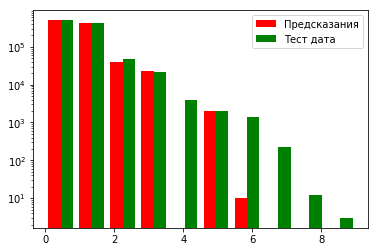

In [48]:
#Logarithmic Histogram
plt.hist((np.reshape(cat_predAt,(yte.shape[0],)),yte),bins = 10, log=True, color = ['Red', 'Green'])
plt.legend(labels=('Предсказания','Тест дата'))
plt.show()